# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Online_Retail.csv')
df = data.copy()

df.head()

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,1,1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


- Merapikan data dengan cara menghapus kolom yang tidak diperlukan

In [3]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Country', 'Description', 'InvoiceNo', 'StockCode'], axis = 1, inplace = True)

- memisahkan data agar data dapat diproses karena karakter spesial dapat mengganggu ketika sedang meproses data

In [4]:
df['InvoiceDate'].str.split(pat = '/')

0          [12, 1, 10 8:26]
1          [12, 1, 10 8:26]
2          [12, 1, 10 8:26]
3          [12, 1, 10 8:26]
4          [12, 1, 10 8:26]
                ...        
541904    [12, 9, 11 12:50]
541905    [12, 9, 11 12:50]
541906    [12, 9, 11 12:50]
541907    [12, 9, 11 12:50]
541908    [12, 9, 11 12:50]
Name: InvoiceDate, Length: 541909, dtype: object

In [5]:
df['Day'] = df['InvoiceDate'].str.split(pat = '/').str[0]

In [6]:
df['Month'] = df['InvoiceDate'].str.split(pat = '/').str[1]

In [7]:
df['Year'] = df['InvoiceDate'].str.split(pat = '/').str[2]

In [8]:
df['Hour'] = df['Year'].str.split(pat = ' ').str[1]

- mengubah : menjadi . agar dianggap sebagai float

In [9]:
df['Hour'] = df['Hour'].str.replace(':','.')

In [10]:
df['Year'] = df['Year'].str.split(pat = ' ').str[0]

- menghapus kolom InvoiceDate karena sudah tidak diperlukan

In [11]:
df.drop(['InvoiceDate'], axis = 1, inplace = True)

- berkenalan dengan data untuk mengetahui missing value dan tipe data secara bersamaan

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Quantity    541909 non-null  int64  
 1   UnitPrice   541909 non-null  float64
 2   CustomerID  406829 non-null  float64
 3   Day         541909 non-null  object 
 4   Month       541909 non-null  object 
 5   Year        541909 non-null  object 
 6   Hour        541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


- ubah tipe data menjadi int dan float

In [13]:
# Convert 'Day', 'Month', 'Year' to integer
df['Day'] = pd.to_numeric(df['Day'])
df['Month'] = pd.to_numeric(df['Month'])
df['Year'] = pd.to_numeric(df['Year'])

# Convert 'Hour' to float
df['Hour'] = df['Hour'].astype(float)


- menghapus data yang hilang karena jika data diisi secara sembaranganan akan merusak clustering

In [14]:
df = df.dropna()

- cek data yang terduplikasi lalu menhapusnya

In [15]:
df.duplicated().sum()

151539

In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [31]:
df_fit = df[['UnitPrice', 'Quantity']]

In [32]:
df_fit

,UnitPrice,Quantity
0,2.55,6
1,3.39,6
2,2.75,8
5,7.65,2
6,4.25,6
...,...,...
541901,1.95,8
541903,4.15,4
541904,0.85,12
541905,2.10,6


In [33]:
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [34]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [43]:
df_fit['Cluster'] = kmeans.labels_

C:\Users\azrul\AppData\Local\Temp\ipykernel_17620\1132795534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fit['Cluster'] = kmeans.labels_


<Axes: >

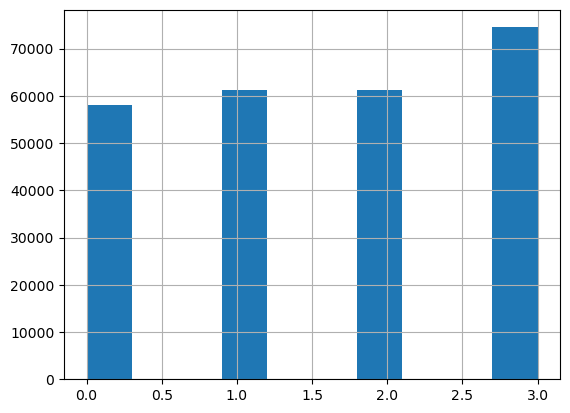

In [44]:
df_fit.Cluster.hist()

<Axes: >

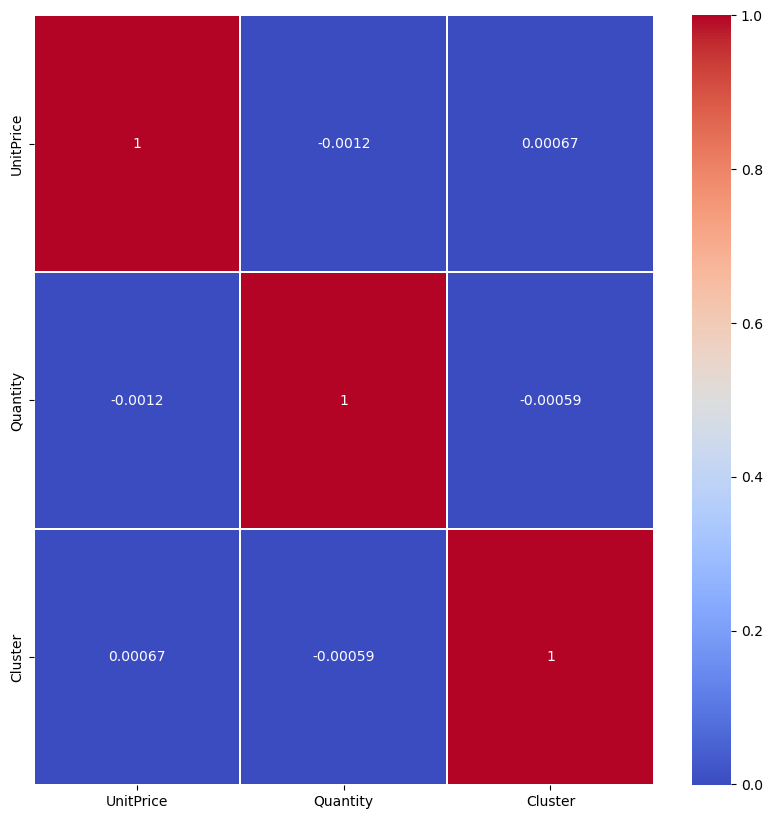

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(df_fit.corr(), annot=True, cmap= 'coolwarm', linewidths = 0.2)

In [46]:
df.Cluster.unique()

array([2, 1, 3, 0])

In [47]:
df.head()

,Quantity,UnitPrice,CustomerID,Day,Month,Year,Hour,Cluster
0,6,2.55,17850.0,12,1,10,8.26,2
1,6,3.39,17850.0,12,1,10,8.26,2
2,8,2.75,17850.0,12,1,10,8.26,2
5,2,7.65,17850.0,12,1,10,8.26,2
6,6,4.25,17850.0,12,1,10,8.26,2


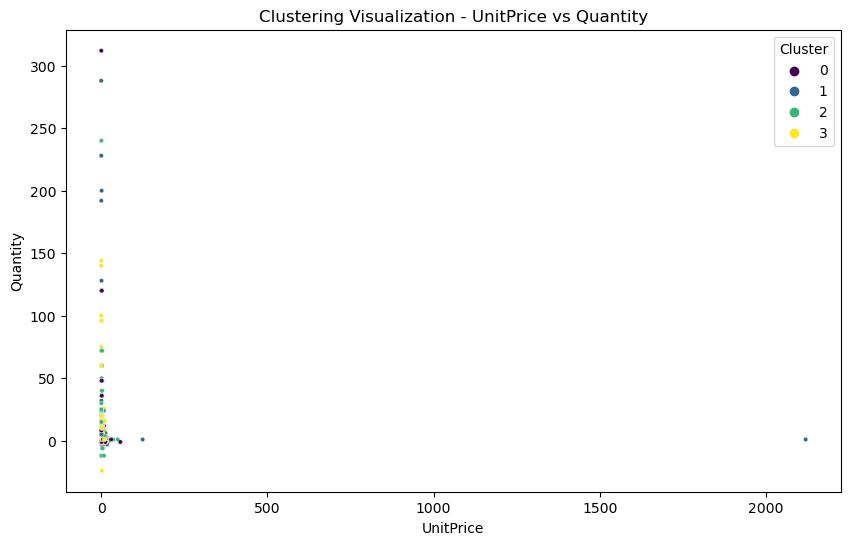

In [48]:
df_sample = df_fit.sample(n=1000)  # Ganti 1000 dengan jumlah sampel yang diinginkan

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='UnitPrice', y='Quantity', hue='Cluster', palette='viridis', s=10)
plt.title('Clustering Visualization - UnitPrice vs Quantity')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.show()

NameError: name 'df' is not defined